<div style="text-align: center"> <h1> Assignment - 9

<div style="text-align: center"> <h3>CS677 A1 Data Science with Python (Fall 2024)

<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>

### **Part - 1 Diabetes Prediction**

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Solution - 1.1**

In [28]:
#Load the dataset
df = pd.read_csv("Diabetes dataset.csv")
df

,No,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,764,10,101,76,48,180,32.9,0.171,63,0
764,765,2,122,70,27,0,36.8,0.340,27,0
765,766,5,121,72,23,112,26.2,0.245,30,0
766,767,1,126,60,0,0,30.1,0.349,47,1


In [29]:
# Extract the desired features and subsets
df_0 = df[df['Outcome'] == 0][['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]
df_1 = df[df['Outcome'] == 1][['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]

##### **Solution - 1.2**

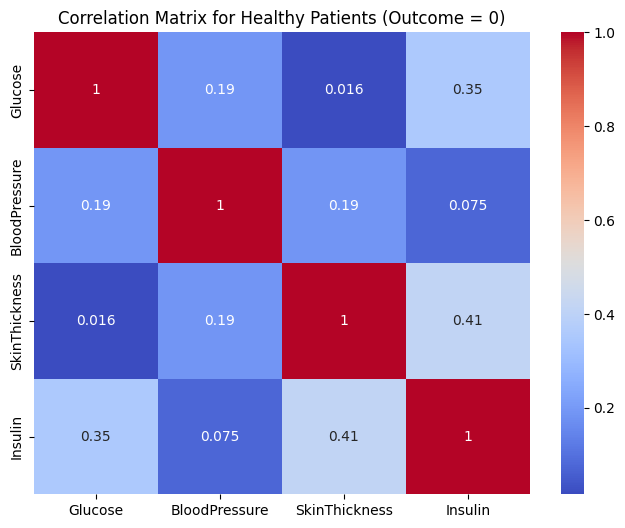

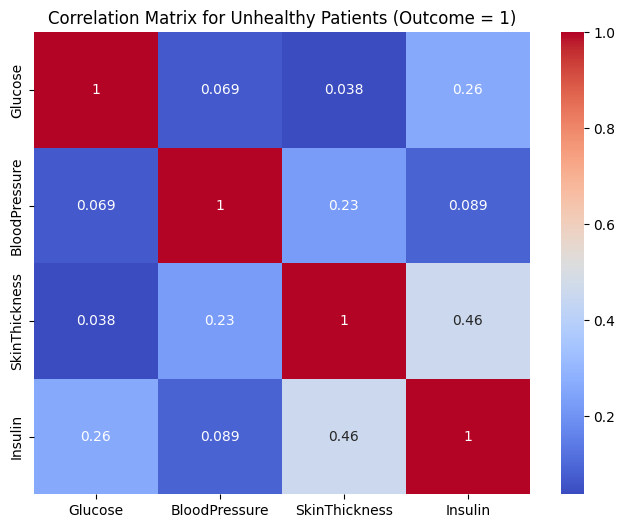

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrices
correlation_matrix_0 = df_0.corr()
correlation_matrix_1 = df_1.corr()

# Plot correlation matrix for healthy patients
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_0, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Healthy Patients (Outcome = 0)')
plt.savefig('correlation_matrix_healthy.png')
plt.show()

# Plot correlation matrix for unhealthy patients
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Unhealthy Patients (Outcome = 1)')
plt.savefig('correlation_matrix_unhealthy.png')
plt.show()


##### **Solution - 1.3**

**💡Interpretations💡-**

**a) Highest correlation for Healthy patients:**
The highest correlation in the healthy patients' matrix (Outcome = 0) is between  'insulin' & 'skin_thinkness', with a value of 0.41.

**b) Lowest correlation for healthy patients:**
The lowest correlation in (Outcome = 0) is between `glucose' & 'skin_thickness' with a value of 0.016.

**c) Highest correlation for unhealthy patients:**
The highest correlation in the decreased patients' matrix (Outcome = 1) is between between  'insulin' & 'skin_thinkness', with a value of 0.46.

**d) Lowest correlation for unhealthy patients:**
The lowest correlation in Outcome = 1 is between `glucose' & 'blood_pressure' with a value of 0.069.

**e) Conclusion**
The results differ between the two cases. The features with the highest correlations in healthy patients are same as in unhealthy patients.

The features with the lowest correlations in healthy patients are not the same as in unhealthy patients, suggesting different relationships among these clinical features for each group.

##### **Solution - 1.4**

In [31]:
import numpy as np

# Compute mean and standard deviation for each class and feature
mean_std_0 = {
    "class": 0,
    "µ(f1)": round(df_0['Glucose'].mean(), 2),
    "σ(f1)": round(df_0['Glucose'].std(), 2),
    "µ(f2)": round(df_0['BloodPressure'].mean(), 2),
    "σ(f2)": round(df_0['BloodPressure'].std(), 2),
    "µ(f3)": round(df_0['SkinThickness'].mean(), 2),
    "σ(f3)": round(df_0['SkinThickness'].std(), 2),
    "µ(f4)": round(df_0['Insulin'].mean(), 2),
    "σ(f4)": round(df_0['Insulin'].std(), 2),
}

mean_std_1 = {
    "class": 1,
    "µ(f1)": round(df_1['Glucose'].mean(), 2),
    "σ(f1)": round(df_1['Glucose'].std(), 2),
    "µ(f2)": round(df_1['BloodPressure'].mean(), 2),
    "σ(f2)": round(df_1['BloodPressure'].std(), 2),
    "µ(f3)": round(df_1['SkinThickness'].mean(), 2),
    "σ(f3)": round(df_1['SkinThickness'].std(), 2),
    "µ(f4)": round(df_1['Insulin'].mean(), 2),
    "σ(f4)": round(df_1['Insulin'].std(), 2),
}

mean_std_all = {
    "class": "all",
    "µ(f1)": round(df[['Glucose']].mean().values[0], 2),
    "σ(f1)": round(df[['Glucose']].std().values[0], 2),
    "µ(f2)": round(df[['BloodPressure']].mean().values[0], 2),
    "σ(f2)": round(df[['BloodPressure']].std().values[0], 2),
    "µ(f3)": round(df[['SkinThickness']].mean().values[0], 2),
    "σ(f3)": round(df[['SkinThickness']].std().values[0], 2),
    "µ(f4)": round(df[['Insulin']].mean().values[0], 2),
    "σ(f4)": round(df[['Insulin']].std().values[0], 2),
}

# Summarize results in a table
summary_table = pd.DataFrame([mean_std_0, mean_std_1, mean_std_all])
summary_table

,class,µ(f1),σ(f1),µ(f2),σ(f2),µ(f3),σ(f3),µ(f4),σ(f4)
0,0,109.98,26.14,68.18,18.06,19.66,14.89,68.79,98.87
1,1,141.26,31.94,70.82,21.49,22.16,17.68,100.34,138.69
2,all,120.89,31.97,69.11,19.36,20.54,15.95,79.80,115.24


##### **Solution - 1.4**

**Summary Table Interpretations:**

**Glucose (f1) and Insulin (f4) -** are the most differentiating features between class 0 and class 1. Class 1 has higher mean values and greater variability for both these features compared to class 0.

**Blood Pressure (f2) and Skin Thickness (f3) -** show smaller differences in means between the two classes, but class 1 still has slightly higher values and greater variability.

Conclusion: The patterns suggest that glucose and insulin levels are key features in distinguishing between the two classes, with class 1 generally exhibiting higher and more variable values. Blood pressure and skin thickness show less pronounced differences but may still contribute to the overall classification.

##### **Solution - 3.1**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Split the data into training and testing sets
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Compute confusion matrix and accuracy
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)


##### **Solution - 3.2**

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Function to apply k-NN with different values of k
def knn_classifier(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    cm_knn = confusion_matrix(y_test, y_pred_knn)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    return cm_knn, accuracy_knn

# Apply k-NN for k = 1, 3, 5
cm_knn_1, accuracy_knn_1 = knn_classifier(1)
cm_knn_3, accuracy_knn_3 = knn_classifier(3)
cm_knn_5, accuracy_knn_5 = knn_classifier(5)


##### **Solution - 3.3**

In [9]:
from sklearn.naive_bayes import GaussianNB

# Apply Naive Bayesian Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)


##### **Solution - 3.4**

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
cm_lda = confusion_matrix(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)


##### **Solution - 3.5**

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Apply Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
cm_qda = confusion_matrix(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)


##### **Solution - 3.6**

In [12]:
# Helper function to calculate True Positive Rate (TPR) and True Negative Rate (TNR)
def calculate_tpr_tnr(cm):
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    return TP, FP, TN, FN, TPR, TNR

# Compile results
results = []
methods = ['Logistic Reg.', 'k-NN (k = 1)', 'k-NN (k = 3)', 'k-NN (k = 5)', 'Naive Bayesian NB', 'Linear Discr.', 'Quadr. Discr.']
confusion_matrices = [cm_log_reg, cm_knn_1, cm_knn_3, cm_knn_5, cm_nb, cm_lda, cm_qda]
accuracies = [accuracy_log_reg, accuracy_knn_1, accuracy_knn_3, accuracy_knn_5, accuracy_nb, accuracy_lda, accuracy_qda]

for method, cm, accuracy in zip(methods, confusion_matrices, accuracies):
    TP, FP, TN, FN, TPR, TNR = calculate_tpr_tnr(cm)
    results.append({
        "method": method,
        "TP": TP, "FP": FP, "TN": TN, "FN": FN,
        "accuracy": round(accuracy, 2),
        "TPR": round(TPR, 2),
        "TNR": round(TNR, 2)
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df

,method,TP,FP,TN,FN,accuracy,TPR,TNR
0,Logistic Reg.,40,24,127,40,0.72,0.50,0.84
1,k-NN (k = 1),40,41,110,40,0.65,0.50,0.73
2,k-NN (k = 3),37,36,115,43,0.66,0.46,0.76
3,k-NN (k = 5),38,27,124,42,0.70,0.48,0.82
4,Naive Bayesian NB,40,24,127,40,0.72,0.50,0.84
5,Linear Discr.,39,24,127,41,0.72,0.49,0.84
6,Quadr. Discr.,41,22,129,39,0.74,0.51,0.85


**Interpretation of Results**

**Quadratic Discriminant:**
Is the best model for Female paitients of Pima Indian Heritage for prediction of diabetes amongst all the models, with highest accuracy (0.74), True Positive Rate (TPR) (0.51) and True Negative Rate (TNR) (0.85). Has the highest True Positive (49) and True Negative values (129).

**Naive Bayesian & Logistic regression** are more or less the same accuracy, TPR & TNR.

**kNN with (k = 1)**
Is the worst model for Female paitients of Pima Indian Heritage for prediction of diabetes amongst all the models.

##### **Solution - 2**

### **Part 2 - Discriminant Analysis**

In [13]:
df = pd.read_excel("META_weekly_return_detailed.xlsx")

In [14]:
# Looking at the dataframe
df

,Open,High,Low,Close,Adj Close,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility,Label
0,358.989990,360.000000,351.820007,353.959992,352.897461,14980500,-1.217,2023-12-29,52,2023,29,Friday,0.043000,0.889220,Green
1,359.700012,361.899994,357.809998,358.320007,357.244385,11798800,0.137,2023-12-28,52,2023,28,Thursday,0.043000,0.889220,Green
2,356.070007,359.000000,355.309998,357.829987,356.755859,13207900,0.845,2023-12-27,52,2023,27,Wednesday,0.043000,0.889220,Green
3,354.989990,356.980011,353.450012,354.829987,353.764832,9898600,0.407,2023-12-26,52,2023,26,Tuesday,0.043000,0.889220,Green
4,355.579987,357.200012,351.220001,353.390015,352.329193,11764200,-0.198,2023-12-22,51,2023,22,Friday,1.086600,1.349914,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,139.889999,143.139999,139.539993,142.529999,142.102158,26263800,3.245,2019-01-08,1,2019,8,Tuesday,0.842400,1.456660,NaN
1254,137.559998,138.869995,135.910004,138.050003,137.635590,20089300,0.072,2019-01-07,1,2019,7,Monday,0.842400,1.456660,NaN
1255,134.009995,138.000000,133.750000,137.949997,137.535889,29002100,4.714,2019-01-04,0,2019,4,Friday,0.603333,3.844670,NaN
1256,134.690002,137.169998,131.119995,131.740005,131.344528,22717900,-2.904,2019-01-03,0,2019,3,Thursday,0.603333,3.844670,NaN


In [15]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

feature_values = df[df['Year'].isin([2022, 2023])].groupby(['Week_Number', 'Year']).agg(
    mean = ('mean_return', lambda x: round(x.mean()* 100,2)),
    std = ('Return', lambda x: round(x.std()* 100,2)),
    Label = ('Label', 'first'),
).reset_index()

feature_values.head(10)

# Split data into Year 1 and Year 2
year_1 = feature_values[feature_values['Year'] == 2022]
year_2 = feature_values[feature_values['Year'] == 2023]

In [16]:
feature_values

,Week_Number,Year,mean,std,Label
0,1,2022,-25.22,226.54,Red
1,1,2023,196.30,167.29,Green
2,2,2022,1.86,172.80,Red
3,2,2023,105.88,160.29,Green
4,3,2022,-221.70,234.53,Red
...,...,...,...,...,...
99,50,2023,14.30,180.34,Green
100,51,2022,-20.06,286.58,Green
101,51,2023,108.66,134.99,Green
102,52,2022,50.48,239.57,Green


In [17]:
# Features and labels
X_train = year_1[['mean', 'std']]
y_train = year_1['Label']
X_test = year_2[['mean', 'std']]
y_test = year_2['Label']

##### **Solution - 1**

In [18]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)

##### **Solution - 2, 3 & 4**

In [19]:
# Compute TPR and TNR for both classifiers
tpr_lda = conf_matrix_lda[1, 1] / (conf_matrix_lda[1, 1] + conf_matrix_lda[1, 0])
tnr_lda = conf_matrix_lda[0, 0] / (conf_matrix_lda[0, 0] + conf_matrix_lda[0, 1])

tpr_qda = conf_matrix_qda[1, 1] / (conf_matrix_qda[1, 1] + conf_matrix_qda[1, 0])
tnr_qda = conf_matrix_qda[0, 0] / (conf_matrix_qda[0, 0] + conf_matrix_qda[0, 1])

In [20]:
# Print results
print("LDA Accuracy:", accuracy_lda)
print("LDA Confusion Matrix:\n", conf_matrix_lda)
print("LDA TPR:", tpr_lda)
print("LDA TNR:", tnr_lda)

print("QDA Accuracy:", accuracy_qda)
print("QDA Confusion Matrix:\n", conf_matrix_qda)
print("QDA TPR:", tpr_qda)
print("QDA TNR:", tnr_qda)


LDA Accuracy: 0.7884615384615384
LDA Confusion Matrix:
 [[32  2]
 [ 9  9]]
LDA TPR: 0.5
LDA TNR: 0.9411764705882353
QDA Accuracy: 0.7307692307692307
QDA Confusion Matrix:
 [[29  5]
 [ 9  9]]
QDA TPR: 0.5
QDA TNR: 0.8529411764705882


##### **Solution - 5**

In [21]:
# Initial investment amount
initial_investment = 100

# Function to calculate the final amount for a given strategy
def simulate_strategy(predicted_labels, returns):
    investment = initial_investment
    for label, weekly_return in zip(predicted_labels, returns):
        if label == "Green":  # Invest if label is Green
            investment *= (1 + weekly_return / 100)
    return investment

# Weekly returns for Year 2
weekly_returns = year_2['mean'].values

# Simulate LDA-based strategy
lda_labels = y_pred_lda
final_amount_lda = simulate_strategy(lda_labels, weekly_returns)

# Simulate QDA-based strategy
qda_labels = y_pred_qda
final_amount_qda = simulate_strategy(qda_labels, weekly_returns)

# Simulate buy-and-hold strategy
buy_and_hold_amount = initial_investment * (1 + sum(weekly_returns) / 100)

# Print results
print("Final Amount (LDA Strategy): ${:.2f}".format(final_amount_lda))
print("Final Amount (QDA Strategy): ${:.2f}".format(final_amount_qda))
print("Final Amount (Buy-and-Hold Strategy): ${:.2f}".format(buy_and_hold_amount))


Final Amount (LDA Strategy): $16765835745.91
Final Amount (QDA Strategy): $2623015853.14
Final Amount (Buy-and-Hold Strategy): $2509.98


It looks like both the LDA and QDA trading strategies significantly outperformed the buy-and-hold strategy over Year 2:

- **LDA Strategy**: `$16765835745.91`
- **QDA Strategy**: `$2623015853.14`
- **Buy-and-Hold Strategy**: `$2509.98`

### Interpretation
1. **LDA-Based Strategy**:
   - The LDA strategy resulted in the highest final amount, suggesting that the linear classifier did a good job distinguishing between favorable and unfavorable weeks for investment.
   - This could indicate that market patterns were more linearly separable, making LDA predictions particularly effective.

2. **QDA-Based Strategy**:
   - The QDA strategy also outperformed the buy-and-hold approach but didn’t achieve as high a final amount as LDA.
   
3. **Buy-and-Hold Strategy**:
   - The buy-and-hold approach, though simple and commonly used, resulted in the lowest final amount, indicating that selective trading based on weekly predictions was more profitable in this case.

### Insights & Discussion
- **Model Effectiveness**: The higher performance of the LDA and QDA strategies indicates that these models were able to capture meaningful patterns in the data, leading to more effective investment decisions.

### **Part - 3 Naive Bayesian**

##### **Solution - 1**

In [22]:
# Step 1: Train the Gaussian Naive Bayesian classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Step 2: Predict labels for Year 2
y_pred = model.predict(X_test)

# Step 3: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Year 2:", accuracy)

Accuracy for Year 2: 0.7692307692307693


##### **Solution - 2**

In [23]:
# Step 4: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate TPR and TNR
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

Confusion Matrix:
 [[34  0]
 [12  6]]


##### **Solution - 3**

In [24]:
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
print("True Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)

True Positive Rate (TPR): 0.3333333333333333
True Negative Rate (TNR): 1.0


##### **Solution - 4**

In [25]:
# Initial capital
capital_naive_bayesian = 100
capital_buy_and_hold = 100

# Simulate Naive Bayesian strategy
for label, (_, row) in zip(y_pred, year_2.iterrows()):
    if label == "Green":  # Invest if the label is "Green"
        capital_naive_bayesian *= (1 + row['mean'] / 100)

# Simulate Buy-and-Hold strategy
cumulative_return = year_2['mean'].sum() / 100
capital_buy_and_hold *= (1 + cumulative_return)


print("Final Amount (Naive Bayesian Strategy): ${:.2f}".format(capital_naive_bayesian))
print("Final Amount (Buy-and-Hold Strategy): ${:.2f}".format(capital_buy_and_hold))


Final Amount (Naive Bayesian Strategy): $43178241.09
Final Amount (Buy-and-Hold Strategy): $2509.98


It looks like Naive Bayesian significantly out perform Buy-and-Hold Strategy for the Stock META, based on predictions labeled as "Green," was extremely successful. The strategy likely compounded gains significantly by investing only during weeks forecasted to yield positive returns.